# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

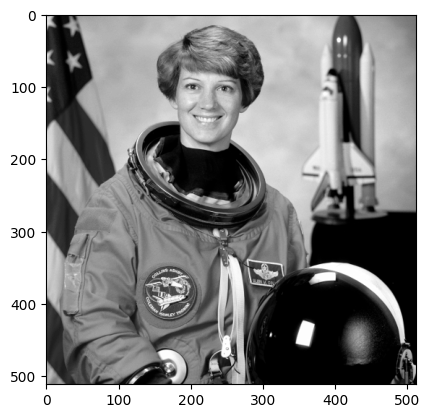

In [2]:
img = plt.imread('data/astronaut.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [78]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] >= n and p[0] < img_in.shape[0] - n and p[1] >= n and p[1] < img_in.shape[1] - n: 
            for q in numpy.ndindex(size, size):
                i = q[0] + p[0] - n
                j = q[1] + p[1] - n
                neighborhood_sum += img_in[i,j]
            result[p[0],p[1]] = neighborhood_sum / size**2
          
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

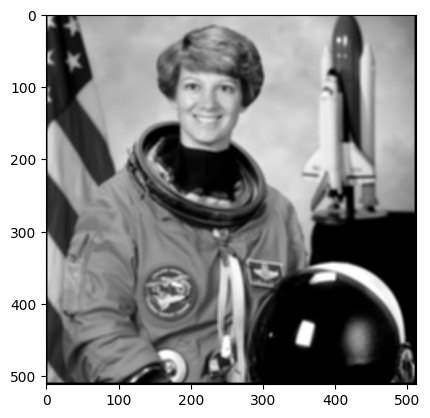

In [79]:
img2 = img.copy()

# meanfilter(img2, size= 5)
img3 = meanfilter(img2, size= 5)
plt.imshow(img3,'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [81]:
img1 = plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(img1,img3, atol=1/255)


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [87]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_values = list()
        if p[0] >= n and p[0] < img_in.shape[0] - n and p[1] >= n and p[1] < img_in.shape[1] - n: 
            for q in numpy.ndindex(size, size):
                neighborhood_values.append(img_in[q[0] + p[0] - n, q[1] + p[1] - n])
            neighborhood_values.sort()
            result[p] = neighborhood_values[(size*size) // 2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

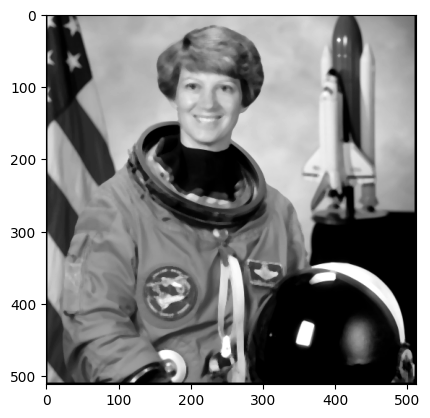

In [89]:
img2 = img.copy()
img4 = medianfilter(img2, size= 5)
plt.imshow(img4,'gray')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [90]:
img5 = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(img5,img4, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [92]:
import scipy.ndimage


**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

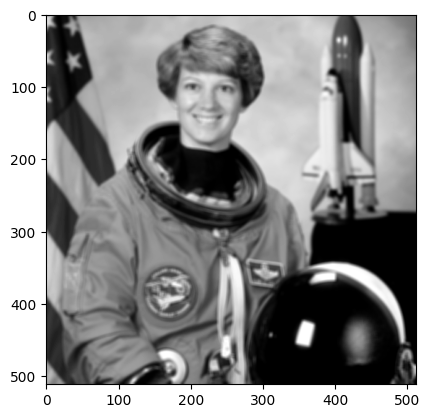

In [97]:
img_mean = scipy.ndimage.uniform_filter(img2, 5)
plt.imshow(img_mean,'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

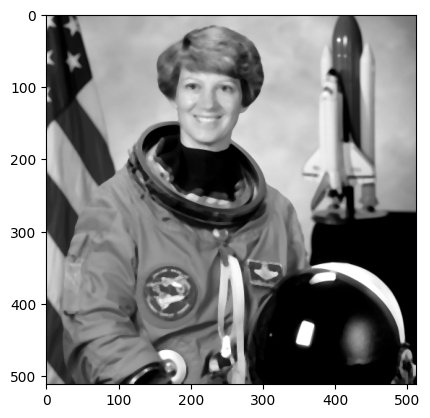

In [99]:
img_median = scipy.ndimage.median_filter(img2, 5)
plt.imshow(img_median,'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

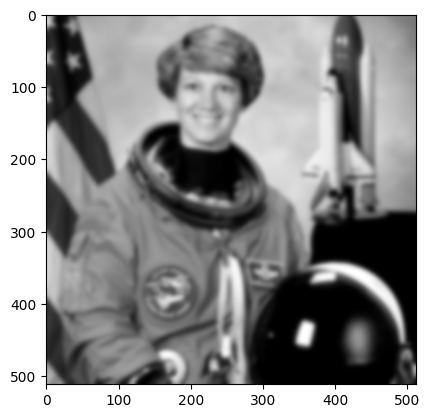

In [102]:
img_gaussian = scipy.ndimage.gaussian_filter(img2, 3)
plt.imshow(img_gaussian,'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: